## 학습목표
- 목적에 맞춰 데이터를 준비하고 다듬는 방법을 알아보자

In [1]:
import pandas as pd
import os

# 1. 데이터 병합

- 4월, 5월, 6월 pat-info 데이터를 각각 불러와서 한개의 df으로 병합해보자

In [2]:
# 월별급여 폴더 내부 파일명 읽어오기
file_names = os.listdir('data/월별급여')
file_names

['hr-pay-info-4월.csv', 'hr-pay-info-5월.csv', 'hr-pay-info-6월.csv']

In [3]:
pay_df_lst = []  # 빈 리스트 생성
for fn in file_names:
    df = pd.read_csv("data/월별급여/"+fn, encoding = 'euc-kr')
    pay_df_lst.append(df)
    display(df)

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791
2,E00164,20240401,월급,758
3,E00190,20240401,월급,708
4,E00209,20240401,월급,716
...,...,...,...,...
448,E00322,20240401,상여금,300
449,E00389,20240401,상여금,300
450,E00438,20240401,상여금,300
451,E00304,20240401,상여금,300


,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240501,월급,850
1,E00181,20240501,월급,791
2,E00164,20240501,월급,758
3,E00190,20240501,월급,708
4,E00209,20240501,월급,716
...,...,...,...,...
146,E00322,20240501,월급,375
147,E00389,20240501,월급,375
148,E00438,20240501,월급,375
149,E00304,20240501,월급,375


,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716
...,...,...,...,...
146,E00322,20240601,월급,375
147,E00389,20240601,월급,375
148,E00438,20240601,월급,375
149,E00304,20240601,월급,375


In [4]:
# 데이터 병합 : concat()
total_df = pd.concat(pay_df_lst)
total_df

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791
2,E00164,20240401,월급,758
3,E00190,20240401,월급,708
4,E00209,20240401,월급,716
...,...,...,...,...
146,E00322,20240601,월급,375
147,E00389,20240601,월급,375
148,E00438,20240601,월급,375
149,E00304,20240601,월급,375


In [5]:
# csv파일로 저장
total_df.to_csv("data/total_pay_info.csv", index = False)

- org_info 데이터에 각 조직별 조직 인원 수 , 평균 나이, 평균근무년수, 평균연봉을 추가해보자

In [6]:
# 조직정보 데이터 확인
org_info = pd.read_csv("data/org-info.csv", encoding = 'euc-kr',
                      index_col = 'ORG_CD')
org_info.head()

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.


In [7]:
# hr_info에서 groupby를 이용해서 조직 인원수, 평균 나이
# 평균 근무년수, 평균연봉 df 생성
hr_info = pd.read_csv('data/hr-info.csv', encoding = 'euc-kr')
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [8]:
org_agg = hr_info.groupby(by = 'ORG_CD').agg({'ENAME' : 'count',
                                    'AGE' : 'mean', 
                                    'SERVICE_YEAR' : 'mean', 
                                    'SALARY' : 'mean'})
org_agg 

,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,
ORG001,6,26.166667,0.333333,5033.333333
ORG002,4,34.000000,7.500000,6550.000000
ORG003,5,34.600000,7.600000,6480.000000
ORG004,11,35.181818,7.000000,6445.454545
ORG005,8,29.250000,2.000000,5525.000000
ORG006,6,30.833333,4.166667,5966.666667
ORG007,7,36.714286,8.000000,6728.571429
ORG008,5,32.400000,5.200000,6020.000000
ORG009,5,29.800000,2.200000,5520.000000


In [9]:
# org_info와 조직 구성된 데이터에서 추출한 df을 가로로 병합
org_info_new = pd.concat([org_info, org_agg], axis = 1)
# axis(축) : 0은 행(아래로), 1은 열(옆으로) 
# concat()함수를 사용한 df 병합 시 주의사항
# 각 df의 인덱스를 같게 해야 올바른 병합이 일어남
org_info_new.head()

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.,5,34.600000,7.600000,6480.000000
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.,11,35.181818,7.000000,6445.454545
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.,8,29.250000,2.000000,5525.000000


### 병합 시각화

- 공통된 컬럼을 기준으로 양쪽의 데이터를 병합할 때 사용
- 데이터베이스에서 조인의 개념을 떠올리면 좋다(inner, outer, left, right)

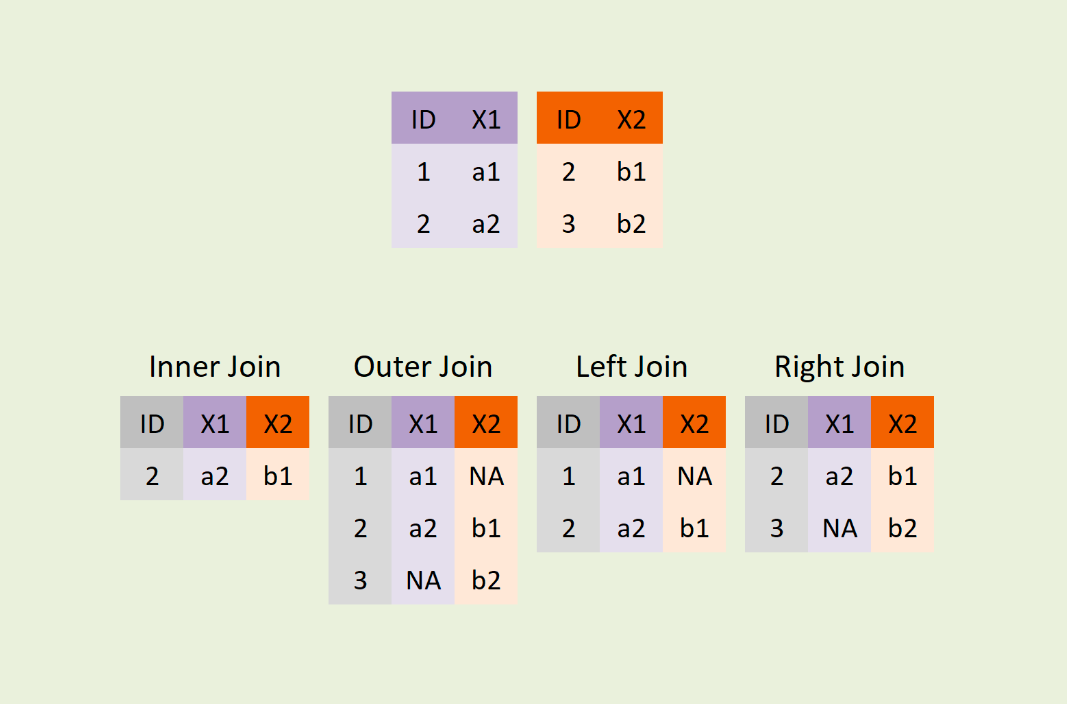

In [10]:
# 급여 지급내역 데이터로딩
hr_pay_info = pd.read_csv('data/hr-pay-info.csv', encoding = 'euc-kr')
hr_pay_info

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716
...,...,...,...,...
750,E00322,20240401,상여금,300
751,E00389,20240401,상여금,300
752,E00438,20240401,상여금,300
753,E00304,20240401,상여금,300


In [11]:
# 데이터 수 확인
print(hr_info.shape)
print(hr_pay_info.shape)

(200, 20)
(755, 4)


In [12]:
display(hr_info.head(1))
display(hr_pay_info.head(1))

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y


,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850


In [13]:
# 둘 다 가지고 있는 EID를 기준으로 병합해보자
# 그리고 우리가 사용할 정보만 출력해서 데이터 프레임을 새로 만들어 보자
hr_info_df = hr_info[['EID','ENAME','GENDER']]
hr_info_df

,EID,ENAME,GENDER
0,E00206,시이오,M
1,E00181,나사장,F
2,E00164,난부사장,M
3,E00190,판라다,F
4,E00209,누훈봉,M
...,...,...,...
195,E00322,부탐회,F
196,E00389,초두반,F
197,E00438,권개득,M
198,E00304,탐출조,M


In [14]:
# 조직구성원 정보를 기반으로 병합(merge) -> Left 조인
total_salary_df1 = pd.merge(hr_info_df, hr_pay_info, on='EID',
                           how = "left")
total_salary_df1

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601.0,월급,850.0
1,E00206,시이오,M,20240501.0,월급,850.0
2,E00206,시이오,M,20240401.0,월급,850.0
3,E00206,시이오,M,20240401.0,성과급,425.0
4,E00206,시이오,M,20240401.0,상여금,300.0
...,...,...,...,...,...,...
799,E00428,을충나,F,20240601.0,월급,375.0
800,E00428,을충나,F,20240501.0,월급,375.0
801,E00428,을충나,F,20240401.0,월급,375.0
802,E00428,을충나,F,20240401.0,성과급,188.0


In [15]:
# 지급된 급여내역을 기준으로 병합 - > right join
total_salary_df2 = pd.merge(hr_info_df, hr_pay_info, on='EID',
                           how = "right")
total_salary_df2

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601,월급,850
1,E00181,나사장,F,20240601,월급,791
2,E00164,난부사장,M,20240601,월급,758
3,E00190,판라다,F,20240601,월급,708
4,E00209,누훈봉,M,20240601,월급,716
...,...,...,...,...,...,...
750,E00322,부탐회,F,20240401,상여금,300
751,E00389,초두반,F,20240401,상여금,300
752,E00438,권개득,M,20240401,상여금,300
753,E00304,탐출조,M,20240401,상여금,300


In [16]:
# 급여 지급내역이 없는 인원들을 확인해보자
total_salary_df1['PAYMENT_DY'].isnull() # -->True, False --> 재료
no_money = total_salary_df1[total_salary_df1['PAYMENT_DY'].isnull()]
no_money

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
80,E00207,초디소,M,NaN,NaN,NaN
86,E00239,헌란처,M,NaN,NaN,NaN
102,E00323,묵단언,F,NaN,NaN,NaN
108,E00394,우전회,F,NaN,NaN,NaN
119,E00174,탐선반,M,NaN,NaN,NaN
150,E00274,민남무,M,NaN,NaN,NaN
181,E00334,무공담,M,NaN,NaN,NaN
182,E00445,속묵우,M,NaN,NaN,NaN
203,E00283,도온강,F,NaN,NaN,NaN
204,E00312,장춘란,F,NaN,NaN,NaN


In [17]:
# 급여 지급내역이 없는 사람들이 언제 퇴사했는지 알아보자
pd.merge(no_money,hr_info)[["ENAME","RETIRE_DATE"]]
# 급여 지급내역이 없는 사람들은 퇴사한 사람들이구나!

,ENAME,RETIRE_DATE
0,초디소,2022-02-28
1,헌란처,2023-02-28
2,묵단언,2023-02-28
3,우전회,2024-02-29
4,탐선반,2024-02-29
5,민남무,2024-02-29
6,무공담,2024-02-29
7,속묵우,2024-02-29
8,도온강,2024-02-29
9,장춘란,2024-02-29


#### 2. 정렬
### sort
- 인덱스를 기준으로 정렬
- 값을 기준으로 정렬

In [19]:
# .set_index : 기존 컬럼을 인덱스로 바꾸는 함수
# .sort_index : 인덱스 기준으로 정렬
hr_info.set_index('EID').sort_index()  

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00163,득치패,M,ORG013,P008,28,0,학사 학위,0.00,5000,2024-03-01,4,"Project Management, Salesforce, Java",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00165,내감반,M,ORG006,P008,24,0,학사 학위,0.00,5000,2024-03-01,4,"Python, Data Analysis",Y,2024-03-01,NaN,NaN,NaN,KOREA,Y
E00167,명묵말,M,ORG013,P005,42,12,석사 학위,3.88,7300,2024-03-01,46,Salesforce,Y,2012-03-01,NaN,NaN,NaN,KOREA,Y
E00168,인환숙,M,ORG025,P007,30,1,학사 학위,4.18,5600,2024-03-01,60,Data Analysis,N,2023-03-01,2024-03-01,이직,N,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00494,탄배매,F,ORG030,P007,30,1,학사 학위,3.67,5600,2024-03-01,49,"Salesforce, Java, Marketing",N,2023-03-01,2024-03-01,건강 문제,N,India,Y
E00495,충창동,F,ORG017,P007,30,1,학사 학위,1.92,5600,2024-03-01,59,"Marketing, Project Management, Data Analysis",N,2023-03-01,2024-03-01,이직,N,UK,Y
E00496,우봉망,F,ORG002,P006,35,7,학사 학위,1.20,6700,2024-03-01,62,"Project Management, Marketing",Y,2017-03-01,NaN,NaN,NaN,USA,Y


In [21]:
# 컬럼기준으로 정렬
hr_info.sort_index(axis=1)
# axis=1로 바꿔주면 축이 바뀌면서 컬럼 이름을 기준으로 정렬이 된다

,ACTIVE_STATE,AGE,EDU_LEVEL,EID,ENAME,GENDER,HIRE_DATE,LAST_PROMO_DT,NATION,ORG_CD,PERFORMANCE_SCORE,POS_CD,REHIRE_YN,RETIRE_DATE,RETIRE_REASON,ROUNDING_DEDUCTION,SALARY,SERVICE_YEAR,SKILLS,TRAINING_HOURS
0,Y,49,박사 학위,E00206,시이오,M,1999-03-01,2024-03-01,KOREA,NaN,4.50,P001,NaN,NaN,NaN,Y,10200,25,"Marketing, Salesforce",240
1,Y,49,박사 학위,E00181,나사장,F,2000-03-01,2024-03-01,KOREA,NaN,4.60,P002,NaN,NaN,NaN,Y,9500,24,"Project Management, Marketing",236
2,Y,48,박사 학위,E00164,난부사장,M,2002-03-01,2024-03-01,KOREA,NaN,4.60,P003,NaN,NaN,NaN,Y,9100,22,"Salesforce, Data Analysis, Java",240
3,Y,47,박사 학위,E00190,판라다,F,2006-03-01,2024-03-01,KOREA,ORG007,3.51,P004,NaN,NaN,NaN,Y,8500,18,"Java, Data Analysis, Salesforce",96
4,Y,47,박사 학위,E00209,누훈봉,M,2005-03-01,2023-03-01,KOREA,ORG023,3.38,P004,NaN,NaN,NaN,Y,8600,19,"Java, Salesforce",66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Y,23,학사 학위,E00322,부탐회,F,2024-09-01,NaN,KOREA,ORG014,0.00,P009,NaN,NaN,NaN,N,4500,0,Java,4
196,Y,23,학사 학위,E00389,초두반,F,2024-09-01,NaN,KOREA,ORG012,0.00,P009,NaN,NaN,NaN,N,4500,0,"Salesforce, Java",4
197,Y,23,학사 학위,E00438,권개득,M,2024-09-01,NaN,KOREA,ORG024,0.00,P009,NaN,NaN,NaN,N,4500,0,Python,4
198,Y,24,학사 학위,E00304,탐출조,M,2024-09-01,NaN,KOREA,ORG009,0.00,P009,NaN,NaN,NaN,N,4500,0,Salesforce,4


In [27]:
# 값을 기준으로 정렬
hr_info.sort_values(by='SALARY') # 연봉을 기준으로 오름차순 정렬
hr_info.sort_values(by='SALARY', ascending=False) # 연봉을 기준으로 내림차순 정렬

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
7,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N


In [30]:
# sort정렬 합수는 기존데이터를 해치지 않고 정렬 결과만 보여주는 함수
# 정렬된 값을 원본데이터에 저장하는 속성 : inplace = True
hr_info.sort_values(by='AGE', ascending=False,inplace=True)

In [31]:
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
8,E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y
14,E00474,규아래,M,ORG016,P004,48,18,학사 학위,2.19,8300,2024-03-01,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,NaN,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N


## rank

In [34]:
org_info_new['SALARY'].rank()
# 꼴등이 1 

ORG_CD
ORG001     2.0
ORG002    28.0
ORG003    26.0
ORG004    25.0
ORG005     8.0
ORG006    15.0
ORG007    30.0
ORG008    16.0
ORG009     6.5
ORG010    23.0
ORG011    29.0
ORG012    11.0
ORG013    14.0
ORG014    17.5
ORG015     1.0
ORG016    27.0
ORG017     6.5
ORG018    12.0
ORG019     5.0
ORG020     3.0
ORG021    24.0
ORG022    17.5
ORG023    10.0
ORG024    13.0
ORG025    20.0
ORG026     4.0
ORG027    21.0
ORG028    19.0
ORG029    22.0
ORG030     9.0
Name: SALARY, dtype: float64

In [38]:
# 연봉이 높은 조직이 1등으로 나오도록
org_info_new['SALARY_RANK'] = org_info_new['SALARY'].rank(ascending=False)
org_info_new.head(2)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY,SALARY_RANK
ORG_CD,,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333,29.0
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000,3.0


### 3. 재구조화
- pivot테이블 구현하기

In [48]:
# 4월 ~ 6월까지 각 사람별로 지급된 급여를 컬럼으로 정리하고 싶다
mp = hr_pay_info['PAYMENT_DVCD'] == '월급'
temp = hr_pay_info[mp][['EID','PAYMENT_DY','PAYMENT_AMOUNT']]
# df.pivot(index=?, columns=?, values=?)
pv = temp.pivot(index='EID',columns='PAYMENT_DY',values='PAYMENT_AMOUNT')

melt

In [50]:
# 인덱스를 컬럼으로 옮겨주는 기능 (기존 인덱스를 숫자 인덱스로 초기화)
pv.reset_index()

PAYMENT_DY,EID,20240401,20240501,20240601
0,E00163,417,417,417
1,E00164,758,758,758
2,E00165,416,416,416
3,E00167,608,608,608
4,E00169,708,708,708
...,...,...,...,...
146,E00487,716,716,716
147,E00491,575,575,575
148,E00496,558,558,558
149,E00497,566,566,566


In [51]:
pv.reset_index().melt(id_vars='EID', value_vars=[20240401,20240501,20240601])

,EID,PAYMENT_DY,value
0,E00163,20240401,417
1,E00164,20240401,758
2,E00165,20240401,416
3,E00167,20240401,608
4,E00169,20240401,708
...,...,...,...
448,E00487,20240601,716
449,E00491,20240601,575
450,E00496,20240601,558
451,E00497,20240601,566


### 4. 데이터 처리
#### apply
- 시용자 정의 함수를 이용해서 행단위 또는 열단위로 직접 작성한 알고리즘을 적용할 수 있는 함수

In [52]:
# skills컬럼에 따라 능력치를 점수를 만들어보자
# 프로그램 스킬(Java, Python) :  1점
# 데이터분석 스킬(Data Analysis) : 2점
def skill(row) :
    point = 0
    if 'Java' in row['SKILLS'] or 'Python' in row['SKILLS']:
        point += 1
    if 'Data Analysis' in row['SKILLS']:
        point += 2
    return point

In [55]:
hr_info['SKILL_POINT'] = hr_info.apply(skill, axis=1)
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,SKILL_POINT
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,0
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,0
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,3
8,E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,...,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y,3
14,E00474,규아래,M,ORG016,P004,48,18,학사 학위,2.19,8300,...,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,...,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,...,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,...,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N,0
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,...,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N,1


- 데이터 삭제 : drop()

In [56]:
# 행 삭제
hr_info.drop(1)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,SKILL_POINT
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,0
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,3
8,E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,...,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y,3
14,E00474,규아래,M,ORG016,P004,48,18,학사 학위,2.19,8300,...,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y,1
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,...,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,...,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,...,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,...,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N,0
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,...,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N,1


In [58]:
# 행 삭제 : 여러개
hr_info.drop([1, 14], inplace=True)
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,SKILL_POINT
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,0
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,3
8,E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,...,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y,3
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,...,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y,3
12,E00346,루신디,F,ORG011,P004,48,19,석사 학위,1.25,8500,...,83,Python,Y,2005-03-01,NaN,NaN,NaN,USA,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,...,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,...,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,...,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N,0
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,...,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N,1


In [60]:
# 열 삭제 -> axis=1
hr_info.drop('ENAME', axis=1)

,EID,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,SKILL_POINT
0,E00206,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,0
2,E00164,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,3
8,E00169,M,ORG004,P004,48,20,학사 학위,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y,3
13,E00411,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y,3
12,E00346,F,ORG011,P004,48,19,석사 학위,1.25,8500,2023-03-01,83,Python,Y,2005-03-01,NaN,NaN,NaN,USA,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
187,E00303,M,ORG030,P009,22,0,학사 학위,0.00,4500,NaN,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
186,E00300,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N,0
185,E00281,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N,1
